https://gist.github.com/electronut/d5e5f68c610821e311b0

Read from serial port and plot

In [60]:
import sys, serial, argparse
import numpy as np
from time import sleep
from collections import deque
from datetime import datetime

import matplotlib.pyplot as plt 
import matplotlib.animation as animation
%matplotlib inline

In [2]:
strPort = '/dev/cu.usbserial-DQ0058HD'     # serial port to access
ser = serial.Serial(strPort, 115200)       # initialise

In [4]:
line = ser.readline()                      # read a line

In [20]:
y_data = float(line.decode('ascii').rstrip()) # decode and strip EOL characters
y_data

1.365

In [21]:
x_data = datetime.now().strftime('%H:%M:%S')  # get the timestamp of the reading
x_data

'07:29:41'

In [42]:
maxLen = 100 # number of readings to display

In [43]:
ax = deque([0.0]*maxLen)    # init the deque of zeros

In [46]:
ax.appendleft(1)     # append to the top of the deque, increases the length of the deque

In [47]:
ax[0]           #

1

In [48]:
ax[-1]  

0.0

In [52]:
len(ax)

99

In [53]:
ax.pop()          # pop the bottom value, reduces length of deque

0.0

In [41]:
len(ax)

102

In [62]:
def get_data(samples):
    x_list = []
    y_list = []
    for i in range(samples):
        x_data = datetime.now()
        x_list.append(x_data)
        line = ser.readline() 
        y_data = float(line.decode('ascii').rstrip())
        y_list.append(y_data)
        sleep(1)
    return x_list, y_list     

In [67]:
x_list, y_list = get_data(samples=15)

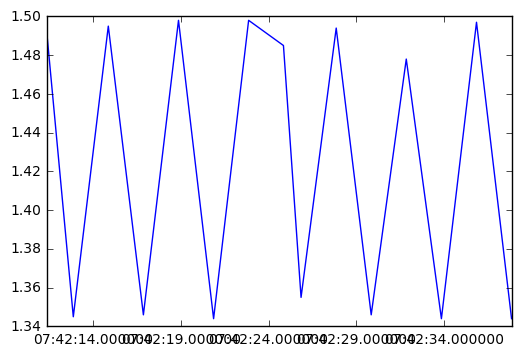

In [68]:
plt.plot(x_list, y_list)